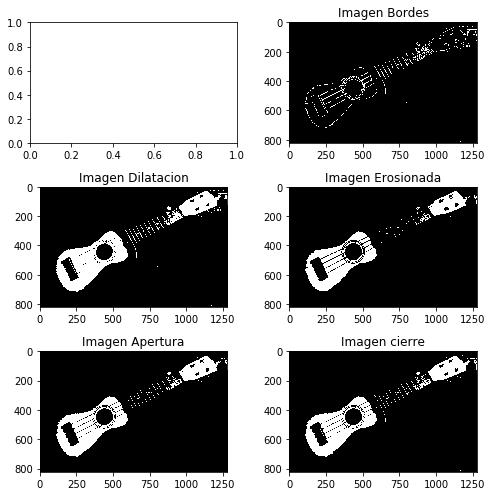

In [18]:
import cv2
from PIL import Image            
import numpy as np                
import matplotlib.pyplot as plt 

def umbral(img, umbral):
    
    filas = np.size(img,0)
    columnas = np.size(img,1)
    
    new_Img = np.zeros((filas,columnas))

    for i in range(0,filas):
        for j in range(0, columnas):
            if img[i,j] <= umbral:
                new_Img[i,j] = 0
            else:
                new_Img[i,j] = 255

    return new_Img

img = cv2.imread('img/ukelele.jpeg',0)
img_bin = umbral(img, 180)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
erosion = cv2.erode(img_bin,kernel,iterations = 1)
dilatacion = cv2.dilate(img_bin,kernel,iterations = 1)
apertura = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
cierre = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)
gradiente = cv2.morphologyEx(img_bin, cv2.MORPH_GRADIENT, kernel)


img_erosion = Image.fromarray(erosion.astype(np.uint8))
img_cierre = Image.fromarray(cierre.astype(np.uint8))
img_Apertura = Image.fromarray(apertura.astype(np.uint8))
img_bordes =Image.fromarray(gradiente.astype(np.uint8))
img_dilatacion = Image.fromarray(dilatacion.astype(np.uint8))

# graficar
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))

axes[1, 1].set_title("Imagen Erosionada")
axes[1, 1].imshow(img_erosion,cmap='gray')

axes[1, 0].set_title("Imagen Dilatacion")
axes[1, 0].imshow(img_dilatacion, cmap='gray')

axes[2, 1].set_title("Imagen cierre")
axes[2, 1].imshow(img_cierre, cmap='gray')

axes[2, 0].set_title("Imagen Apertura")
axes[2, 0].imshow(img_Apertura, cmap='gray')

axes[0, 1].set_title("Imagen Bordes")
axes[0, 1].imshow(img_bordes, cmap='gray')

fig.tight_layout()
plt.show()